## Lead Scoring Case Study
An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. When people fill up the form on website redirected from search engines providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

We need to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO has given a ballpark of the target lead conversion rate to be around 80%.

### Importing Data

In [1]:
#import all the necessary libraries and modules
import warnings
warnings.filterwarnings('ignore')
import numpy as np,pandas as pd
import matplotlib.pyplot as plt,seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#read the csv file
leads=pd.read_csv('Leads.csv')

### Inspecting the Dataframe

In [3]:
#check the top 5 rows of the dataset
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
#check the shape of the data to check the number of rows and columns in the dataset
leads.shape

(9240, 37)

In [5]:
#check the information of the dataset to check if there are null values in the data
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are a lot of missing values which are needed to be treated.

In [6]:
#check the numerical columns of the dataset
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

There seems to be outliers in some columns which need to be treated but we'll treat them later.

In [7]:
column=list(leads.columns)

In [8]:
#Check for invalid value 'Select' in all columns
for i in column:
    print(i,(leads[i]=='Select').sum())

Prospect ID 0
Lead Number 0
Lead Origin 0
Lead Source 0
Do Not Email 0
Do Not Call 0
Converted 0
TotalVisits 0
Total Time Spent on Website 0
Page Views Per Visit 0
Last Activity 0
Country 0
Specialization 1942
How did you hear about X Education 5043
What is your current occupation 0
What matters most to you in choosing a course 0
Search 0
Magazine 0
Newspaper Article 0
X Education Forums 0
Newspaper 0
Digital Advertisement 0
Through Recommendations 0
Receive More Updates About Our Courses 0
Tags 0
Lead Quality 0
Update me on Supply Chain Content 0
Get updates on DM Content 0
Lead Profile 4146
City 2249
Asymmetrique Activity Index 0
Asymmetrique Profile Index 0
Asymmetrique Activity Score 0
Asymmetrique Profile Score 0
I agree to pay the amount through cheque 0
A free copy of Mastering The Interview 0
Last Notable Activity 0


In [9]:
#Imputing invalid values with null
leads['Specialization']=leads['Specialization'].replace('Select',np.nan)
leads['How did you hear about X Education']=leads['How did you hear about X Education'].replace('Select',np.nan)
leads['Lead Profile']=leads['Lead Profile'].replace('Select',np.nan)
leads['City']=leads['City'].replace('Select',np.nan)

In [10]:
#Check if the invalid value has been imputed successfully
for i in column:
    print(i,(leads[i]=='Select').sum())

Prospect ID 0
Lead Number 0
Lead Origin 0
Lead Source 0
Do Not Email 0
Do Not Call 0
Converted 0
TotalVisits 0
Total Time Spent on Website 0
Page Views Per Visit 0
Last Activity 0
Country 0
Specialization 0
How did you hear about X Education 0
What is your current occupation 0
What matters most to you in choosing a course 0
Search 0
Magazine 0
Newspaper Article 0
X Education Forums 0
Newspaper 0
Digital Advertisement 0
Through Recommendations 0
Receive More Updates About Our Courses 0
Tags 0
Lead Quality 0
Update me on Supply Chain Content 0
Get updates on DM Content 0
Lead Profile 0
City 0
Asymmetrique Activity Index 0
Asymmetrique Profile Index 0
Asymmetrique Activity Score 0
Asymmetrique Profile Score 0
I agree to pay the amount through cheque 0
A free copy of Mastering The Interview 0
Last Notable Activity 0


#### Treating Null values

In [11]:
#check the number of null values present in each column
leads.isnull().mean().sort_values(ascending=False)

How did you hear about X Education               0.784632
Lead Profile                                     0.741883
Lead Quality                                     0.515909
Asymmetrique Profile Score                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Profile Index                       0.456494
Asymmetrique Activity Index                      0.456494
City                                             0.397078
Specialization                                   0.365801
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Lead Origin   

Dropping columns with more than 45% as they have very less meaningfull data

In [12]:
#Check the percent of null values present in columns
round((leads.isnull().sum()/len(leads))*100,2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

In [13]:
#dropping columns with more than 45% missing values
col=['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index']
leads=leads.drop(col,axis=1)

In [14]:
#check again the number of null values
round((leads.isnull().sum()/len(leads))*100,2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search    

In [15]:
#check the shape of dataset after dropping columns
leads.shape

(9240, 30)

In [16]:
missing = leads.columns[leads.isnull().sum() > 0]

In [17]:
leads[missing].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Source                                    9204 non-null   object 
 1   TotalVisits                                    9103 non-null   float64
 2   Page Views Per Visit                           9103 non-null   float64
 3   Last Activity                                  9137 non-null   object 
 4   Country                                        6779 non-null   object 
 5   Specialization                                 5860 non-null   object 
 6   What is your current occupation                6550 non-null   object 
 7   What matters most to you in choosing a course  6531 non-null   object 
 8   Tags                                           5887 non-null   object 
 9   City                                           5571 

Filling missing values with mode in categorical columns and mean in numerical columns

In [18]:
#Filling missing values
leads['Lead Source'] = leads['Lead Source'].fillna(leads['Lead Source'].mode()[0])
leads['TotalVisits'] = leads['TotalVisits'].fillna(leads['TotalVisits'].mean())
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mean())
leads['Last Activity'] = leads['Last Activity'].fillna(leads['Last Activity'].mode()[0])
leads['Country'] = leads['Country'].fillna(leads['Country'].mode()[0])
leads['Specialization'] = leads['Specialization'].fillna(leads['Specialization'].mode()[0])
leads['What is your current occupation'] = leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0])
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna(leads['What matters most to you in choosing a course'].mode()[0])
leads['Tags'] = leads['Tags'].fillna(leads['Tags'].mode()[0])
leads['City'] = leads['City'].fillna(leads['City'].mode()[0])

In [19]:
#Lets again check the missing values
leads.isnull().mean()

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

### Outliers

In [20]:
# Retrieving numerical columns
numericals = leads.describe().columns
numericals

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [21]:
# Retrieving categorical columns
categorical = list(set(leads.columns) - set(numericals))
categorical

['Tags',
 'I agree to pay the amount through cheque',
 'What matters most to you in choosing a course',
 'X Education Forums',
 'Lead Source',
 'Last Activity',
 'Lead Origin',
 'Through Recommendations',
 'Get updates on DM Content',
 'City',
 'Digital Advertisement',
 'A free copy of Mastering The Interview',
 'What is your current occupation',
 'Last Notable Activity',
 'Update me on Supply Chain Content',
 'Country',
 'Specialization',
 'Newspaper',
 'Newspaper Article',
 'Receive More Updates About Our Courses',
 'Do Not Email',
 'Prospect ID',
 'Search',
 'Magazine',
 'Do Not Call']

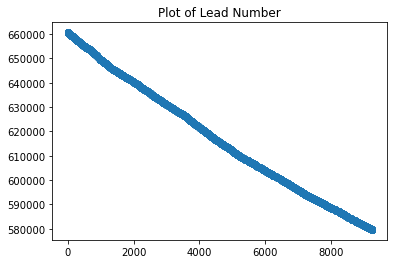

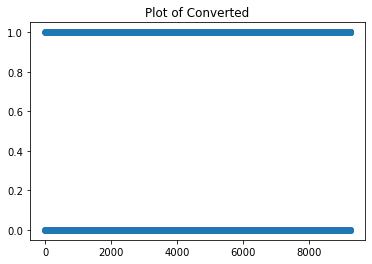

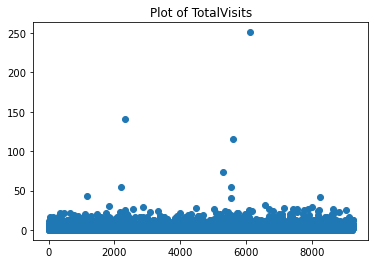

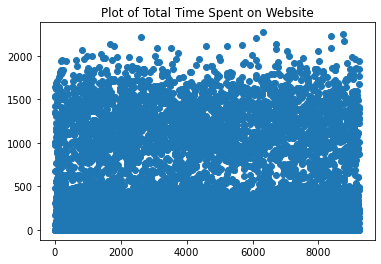

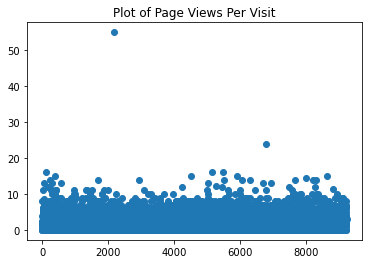

In [22]:
# Outliers
for column in numericals:
    plt.scatter(leads.index, leads[column])
    plt.title("Plot of "+column)
    plt.show()

In [23]:
#first deal with TotalVisits column which has one outlier around 250
leads = leads[leads['TotalVisits'] <= 240]

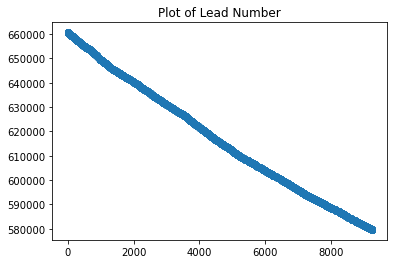

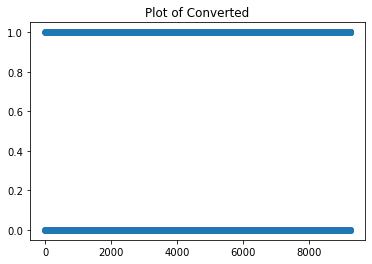

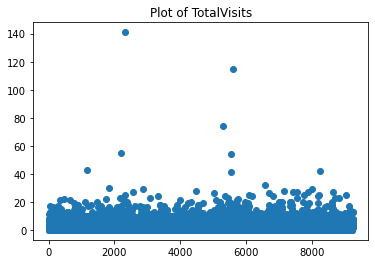

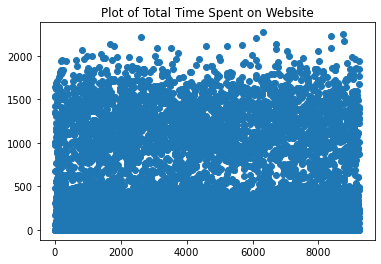

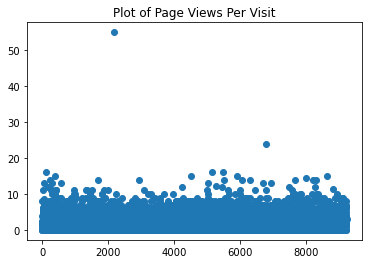

In [24]:
#again check for outliers
for column in numericals:
    plt.scatter(leads.index, leads[column])
    plt.title("Plot of "+column)
    plt.show()

In [25]:
#now deal with 'Page Views Per Visit' column which has one outlier around 250
leads = leads[leads['Page Views Per Visit'] <= 20]

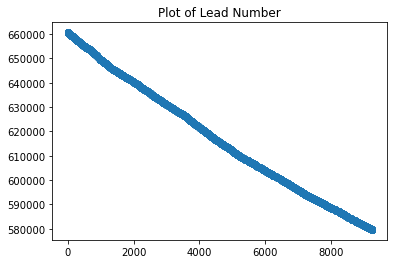

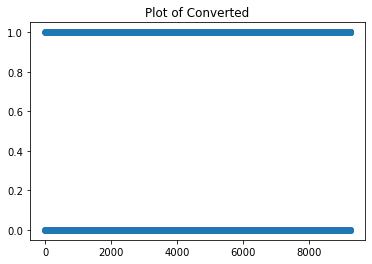

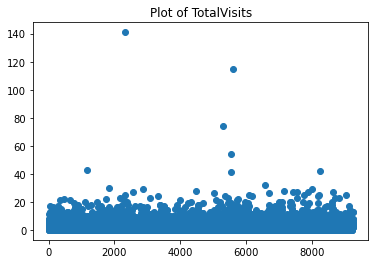

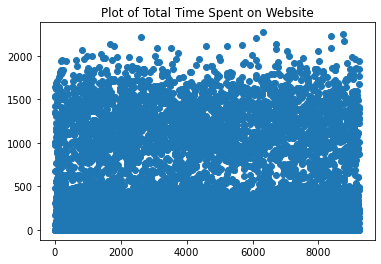

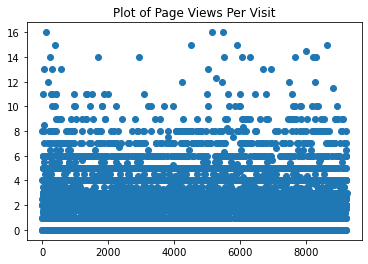

In [26]:
#again check for outliers
for column in numericals:
    plt.scatter(leads.index, leads[column])
    plt.title("Plot of "+column)
    plt.show()

Now it looks good, outliers are now treated

#### Converting some binary variables (Yes/No) to 0/1

In [27]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                     No  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No  Mumbai   
1                                No                        No  Mumbai   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 30 columns]

In [28]:
col=['Search', 'Do Not Email','Do Not Call', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Through Recommendations']

In [29]:
def conversion(x):
     return x.map({'Yes':1,'No':0})

In [30]:
leads[col]=leads[col].apply(conversion)

In [31]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Digital Advertisement Through Recommendations  \
0                     0                       0   
1                     0                       0   
2                     0                       0   
3                     0                       0   
4                     0                       0   

  Receive More Updates About Our Courses                                 Tags  \
0                                      0          Interested in other courses   
1                                      0                              Ringing   
2                                      0  Will revert after reading the email   
3                                      0                              Ringing   
4                                      0  Will revert after reading the email   

  Update me on Supply Chain Content  Get updates on DM Content    City  \
0                                 0                          0  Mumbai   
1                                 0                          0  Mumbai   
2                                 0                          0  Mumbai   
3                                 0                          0  Mumbai   
4                                 0                          0  Mumbai   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 30 columns]

For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [32]:
dummy = pd.get_dummies(leads[['Lead Origin','Lead Source', 'What is your current occupation','Last Activity','Specialization', 'Tags','What matters most to you in choosing a course', 'Last Notable Activity']],drop_first=True)
dummy

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       1                          0   
4                                       1                          0   
...                                   ...                        ...   
9235                                    1                          0   
9236                                    1                          0   
9237                                    1                          0   
9238                                    1                          0   
9239                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
...                       ...                         ...   
9235                        0                           0   
9236                        0                           0   
9237                        0                           0   
9238                        0                           0   
9239                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                              0                     0                   0   
1                              0                     0                   0   
2                              1                     0                   0   
3                              1                     0                   0   
4                              0                     0                   1   
...                          ...                   ...                 ...   
9235                           1                     0                   0   
9236                           1                     0                   0   
9237                           1                     0                   0   
9238                           0                     0                   1   
9239                           1                     0                   0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  ...  \
0                         0                   0                       1  ...   
1                         0                   0                       0  ...   
2                         0                   0                       0  ...   
3                         0                   0                       0  ...   
4                         0                   0                       0  ...   
...                     ...                 ...                     ...  ...   
9235                      0                   0                       0  ...   
9236                      0                   0                       0  ...   
9237                      0                   0                       0  ...   
9238                      0                   0                       0  ...   
9239                      0                   0                       0  ...   

      Last Notable Activity_Form Submitted on Website  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
9235                                                0   
9236                                                0 

In [33]:
#concat dummy variables and drop original columns
leads=pd.concat([leads,dummy],axis=1)
leads=leads.drop(['Lead Origin','Lead Source', 'What is your current occupation','Last Activity','Specialization', 'Tags','What matters most to you in choosing a course', 'Last Notable Activity'],axis=1)

In [34]:
leads.head()

Prospect ID  Lead Number  Do Not Email  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737             0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728             0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727             0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719             0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit Country  Search  ...  \
0                   0.0   India       0  ...   
1                   2.5   India       0  ...   
2                   2.0   India       0  ...   
3                   1.0   India       0  ...   
4                   1.0   India       0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

  Last Notable Activity_View in browser link Clicked  
0                                                  0  
1                                                  0  
2                                                  0  
3                                                  0  
4                                                  0  

[5 rows x 126 columns]

### Test-Train Split

In [35]:
X=leads.drop(['Converted','Lead Number','Prospect ID','Country','City'],axis=1)
y=leads['Converted']

In [36]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])

In [39]:
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3290             0            0    -0.598544                     1.023809   
8957             0            0    -0.350767                    -0.560839   
987              0            0    -0.598544                     0.588986   
7420             0            0     0.144788                     2.422884   
1032             0            0     0.640343                     1.611457   

      Page Views Per Visit  Search  Magazine  Newspaper Article  \
3290             -0.654192       0         0                  0   
8957             -0.173789       0         0                  0   
987              -0.654192       0         0                  0   
7420              0.787017       0         0                  0   
1032              1.747823       0         0                  0   

      X Education Forums  Newspaper  ...  \
3290                   0          0  ...   
8957                   0          0  ...   
987                    0          0  ...   
7420                   0          0  ...   
1032                   0          0  ...   

      Last Notable Activity_Form Submitted on Website  \
3290                                                0   
8957                                                0   
987                                                 0   
7420                                                0   
1032                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3290                                               0   
8957                                               0   
987                                                0   
7420                                               0   
1032                                               0   

      Last Notable Activity_Modified  \
3290                               0   
8957                               0   
987                                1   
7420                               0   
1032                               0   

      Last Notable Activity_Olark Chat Conversation  \
3290                                              0   
8957                                              0   
987                                               0   
7420                                              0   
1032                                              0   

      Last Notable Activity_Page Visited on Website  \
3290                                              0   
8957                                              0   
987                                               0   
7420                                              0   
1032                                              0   

      Last Notable Activity_Resubscribed to emails  \
3290                                             0   
8957                                             0   
987                                              0   
7420                                             0   
1032                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3290                               0                                  0   
8957                               1                                  0   
987                                0                                  0   
7420                               1                                  0   
1032                               1                                  0   

      Last Notable Activity_Unsubscribed  \
3290                                   0   
8957                                   0   
987                                    0   
7420                                   0   
1032                                   0   

      Last Notable Activity_View in browser link Clicked  
3290                                                  0   
8957                                                  0   
987                                                   0   
7420           

In [40]:
#Checking for lead conversion rate
converted=(sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.52982570098517

#### Hence Lead conversion rate on training set is 38.5 percent

### Looking at Correlations

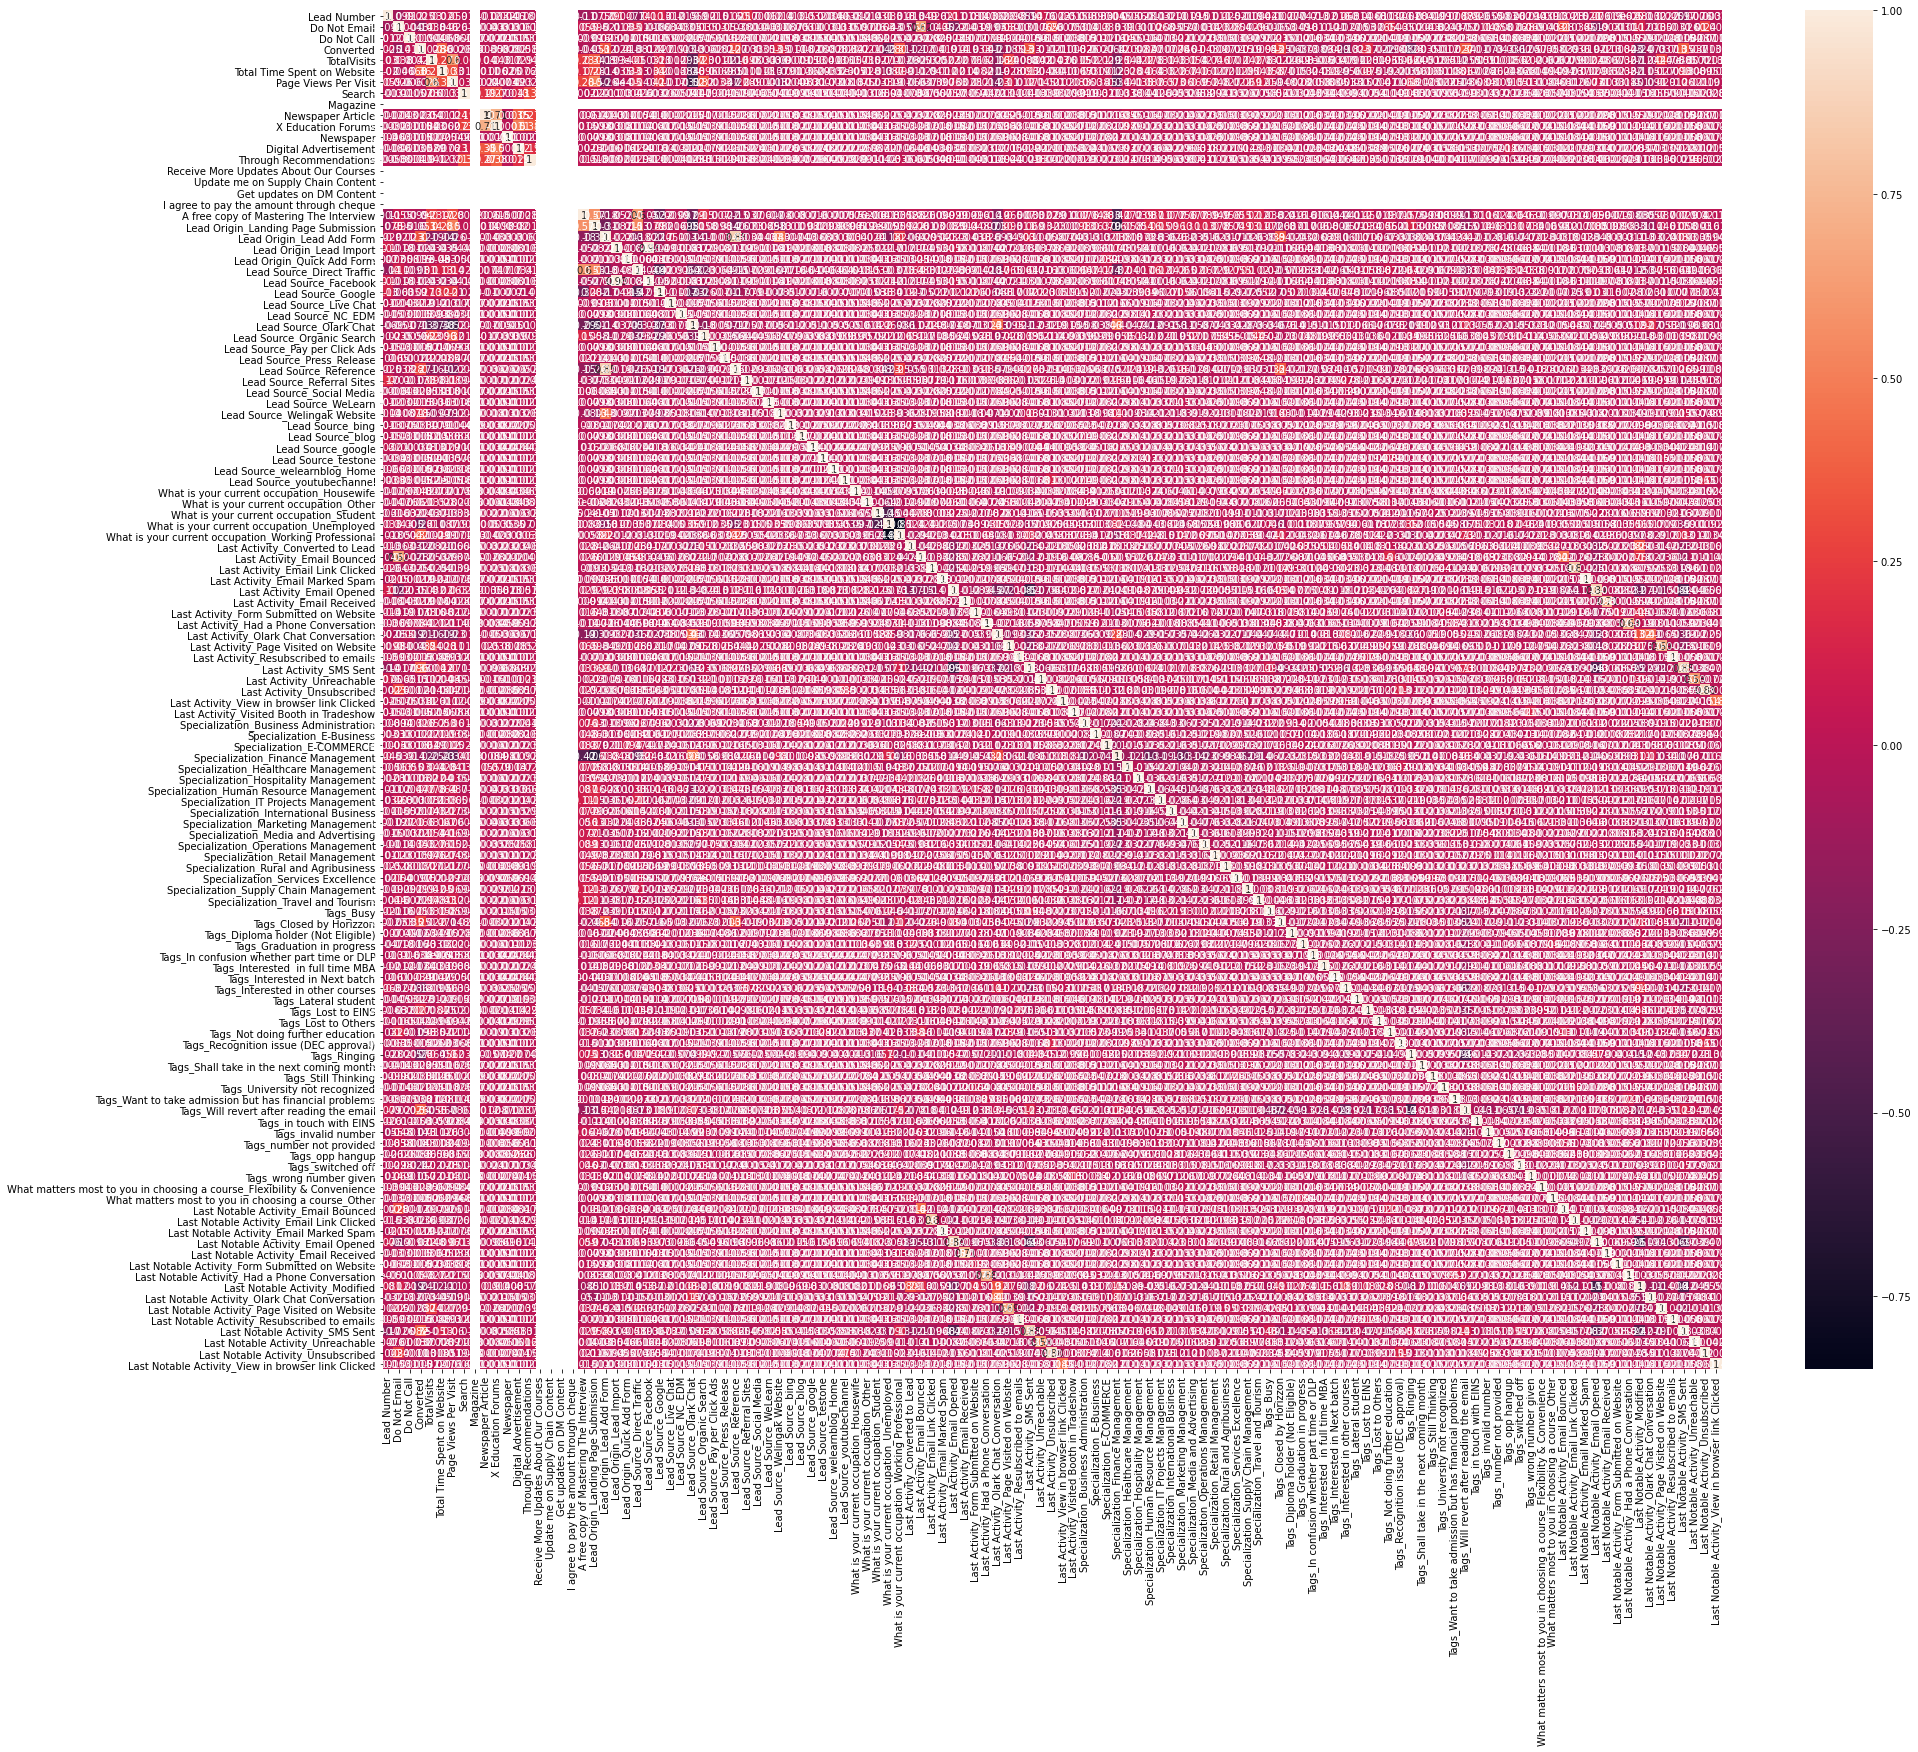

In [41]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,25))
sns.heatmap(leads.corr(),annot = True)
plt.show()

There are not much highly correalated dummy variables, rest can be fixed while Model building.

## Model Building

In [42]:
import statsmodels.api as sm

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6465 entries, 3290 to 5641
Columns: 121 entries, Do Not Email to Last Notable Activity_View in browser link Clicked
dtypes: float64(3), int64(14), uint8(104)
memory usage: 1.5 MB


In [44]:
leads.head()

Prospect ID  Lead Number  Do Not Email  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737             0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728             0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727             0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719             0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit Country  Search  ...  \
0                   0.0   India       0  ...   
1                   2.5   India       0  ...   
2                   2.0   India       0  ...   
3                   1.0   India       0  ...   
4                   1.0   India       0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

  Last Notable Activity_View in browser link Clicked  
0                                                  0  
1                                                  0  
2                                                  0  
3                                                  0  
4                                                  0  

[5 rows x 126 columns]

In [45]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6465
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                          109
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 08 Mar 2021   Deviance:                          nan
Time:                        21:02:03   Pearson chi2:                 4.87e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    3.783e+15   5.36e+07   7.06e+07      0.000    3.78e+15    3.78e+15
Do Not Email                                                             -3.88e+14   4.32e+06  -8.98e+07      0.000   -3.88e+14   -3.88e+14
Do Not Call                                                              4.603e+15   4.77e+07   9.65e+07      0.000     4.6e+15     4.6e+15
TotalVisits                                                              6.195e+12   1.11e+06   5.56e+06      0.000     6.2e+12     6.2e+12
Total Time Spent on Website                                              4.715e+14   9.77e+05   4.83e+08      0.000    4.72e+14    4.72e+14
Page Views Per Visit                                                    -1.754e+13   1.29e+06  -1.36e+07      0.000   -1.75e+13   -1.75e+13
Search                                                                   6.519e+14   2.06e+07   3.17e+07      0.000    6.52e+14    6.52e+14
Magazine                                                                   62.1233   5.78e-07   1.07e+08      0.000      62.123      62.123
Newspaper Article                                                        6.876e+15   6.73e+07   1.02e+08      0.000    6.88e+15    6.88e+15
X Education Forums                                                      -1.551e+16   1.09e+08  -1.42e+08      0.000   -1.55e+16   -1.55e+16
Newspaper                                                               -5.104e+15   6.73e+07  -7.59e+07      0.000    -5.1e+15    -5.1e+15
Digital Advertisement                                                    4.163e+14   3.92e+07   1.06e+07      0.000    4.16e+14    4.16e+14
Through Recommendations                                                   3.06e+15   3.05e+07      1e+08      0.000    3.06e+15    3.06e+15
Receive More Updates About Our Courses                                     33.7731   7.98e-07   4.23e+07      0.000      33.773      33.773
Update me on Supply Chain Content                                          21.0314   4.04e-07   5.21e+07      0.000      21.031      21.031
Get updates on DM Content                                                  50.6842   1.02e-06   4.95e+07      0.000      50.684      50.684
I agree to pay the amount through cheque                                  -65.5800   5.34e-07  -1.23e+08      0.000     -65.580     -65.580
A free copy of Mastering The Interview                                   1.668e+13   2.63e+06   6.34e+06      0.000    1.67e+13    1.67e+13
Lead Origin_Landing Page Submission                                     -9.598e+13   2.94e+06  -3.26e+07      0.000    -9.6e+13    -9.6e+13
Lea

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [47]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9237 entries, 0 to 9239
Columns: 126 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(17), object(3), uint8(104)
memory usage: 2.5+ MB


In [48]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)  
# running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [49]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
        True, False,  True, False])

In [50]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 57),
 ('TotalVisits', False, 82),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 70),
 ('Search', False, 81),
 ('Magazine', False, 93),
 ('Newspaper Article', False, 36),
 ('X Education Forums', False, 42),
 ('Newspaper', False, 77),
 ('Digital Advertisement', False, 74),
 ('Through Recommendations', False, 68),
 ('Receive More Updates About Our Courses', False, 90),
 ('Update me on Supply Chain Content', False, 91),
 ('Get updates on DM Content', False, 92),
 ('I agree to pay the amount through cheque', False, 96),
 ('A free copy of Mastering The Interview', False, 63),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Origin_Quick Add Form', False, 94),
 ('Lead Source_Direct Traffic', False, 35),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 59),
 ('Lead Source_Live Chat', False, 66),
 ('Lea

In [51]:
col = X_train.columns[rfe.support_]

In [52]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_In confusion whether part time or DLP',
       'Tags_Interested in Next batch', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [53]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead

In [54]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6465
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1760.4
Date:                Mon, 08 Mar 2021   Deviance:                       3520.9
Time:                        21:02:21   Pearson chi2:                 1.14e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4340      0.343     -7.106      0.000      -3.105      -1.763
Do Not Email                                            -1.4056      0.208     -6.748      0.000      -1.814      -0.997
Total Time Spent on Website                              1.0153      0.045     22.330      0.000       0.926       1.104
Lead Origin_Lead Add Form                                2.8964      0.242     11.973      0.000       2.422       3.371
Lead Source_Welingak Website                             1.6344      0.767      2.131      0.033       0.131       3.138
What is your current occupation_Unemployed              -1.4750      0.305     -4.831      0.000      -2.073      -0.877
What is your current occupation_Working Professional     1.3007      0.388      3.355      0.001       0.541       2.061
Last Activity_SMS Sent                                   0.8412      0.178      4.713      0.000       0.491       1.191
Tags_Busy                                                3.0677      0.329      9.321      0.000       2.423       3.713
Tags_Closed by Horizzon                                  9.3237      1.041      8.953      0.000       7.283      11.365
Tags_In confusion whether part time or DLP               5.2251      1.474      3.545      0.000       2.336       8.114
Tags_Interested in Next batch                           25.8242   5.84e+04      0.000      1.000   -1.14e+05    1.14e+05
Tags_Lateral student                                    28.5648   6.15e+04      0.000      1.000   -1.21e+05    1.21e+05
Tags_Lost to EINS                                        8.5403      0.765     11.159      0.000       7.040      10.040
Tags_Ringing                                            -1.1020      0.326     -3.385      0.001      -1.740      -0.464
Tags_Will revert after reading the email                 3.6036      0.238     15.146      0.000       3.137       4.070
Tags_in touch with EINS                                  3.6257      0.852      4.253      0.000       1.955       5.296
Tags_invalid number                                     -1.7290      1.161     -1.489      0.136      -4.005       0.547
Tags_number not provided                               -21.4085   2.46e+04     -0.001      0.999   -4.82e+04    4.81e+04
Tags_switched off                                       -1.5125      0.648     -2.334      0.020      -2.783      -0.242
Tags_wrong number given                                -21.4321   1.93e+04     -0.001      0.999   -3.79e+04    3.79e+04
Last Notable Activity_Had a Phone Conversation           2.0186      1.142      1.768      0.077      -0.219       4.257
Last Notable Activity_Modified                          -1

In [55]:
#Dropping columns with p-values more than 0.05
col = col.drop(['Tags_Interested in Next batch', 'Tags_Lateral student', 'Tags_invalid number', 'Tags_number not provided', 'Tags_wrong number given', 'Last Notable Activity_Had a Phone Conversation'], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_In confusion whether part time or DLP', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [56]:
#Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6465
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1781.6
Date:                Mon, 08 Mar 2021   Deviance:                       3563.3
Time:                        21:02:21   Pearson chi2:                 1.16e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4426      0.334     -7.304      0.000      -3.098      -1.787
Do Not Email                                            -1.3877      0.206     -6.749      0.000      -1.791      -0.985
Total Time Spent on Website                              1.0110      0.045     22.389      0.000       0.922       1.099
Lead Origin_Lead Add Form                                2.9373      0.241     12.174      0.000       2.464       3.410
Lead Source_Welingak Website                             1.5774      0.766      2.058      0.040       0.075       3.079
What is your current occupation_Unemployed              -1.4724      0.304     -4.842      0.000      -2.068      -0.876
What is your current occupation_Working Professional     1.2979      0.388      3.347      0.001       0.538       2.058
Last Activity_SMS Sent                                   0.8854      0.178      4.979      0.000       0.537       1.234
Tags_Busy                                                3.0775      0.308      9.989      0.000       2.474       3.681
Tags_Closed by Horizzon                                  9.3291      1.036      9.005      0.000       7.299      11.360
Tags_In confusion whether part time or DLP               5.2022      1.466      3.549      0.000       2.329       8.075
Tags_Lost to EINS                                        8.5470      0.758     11.277      0.000       7.062      10.033
Tags_Ringing                                            -1.0845      0.302     -3.593      0.000      -1.676      -0.493
Tags_Will revert after reading the email                 3.6145      0.211     17.109      0.000       3.200       4.029
Tags_in touch with EINS                                  3.6293      0.845      4.294      0.000       1.973       5.286
Tags_switched off                                       -1.4893      0.637     -2.340      0.019      -2.737      -0.242
Last Notable Activity_Modified                          -1.2747      0.115    -11.111      0.000      -1.500      -1.050
Last Notable Activity_Olark Chat Conversation           -1.5221      0.339     -4.483      0.000      -2.187      -0.857
Last Notable Activity_SMS Sent                           1.2171      0.213      5.716      0.000       0.800       1.634
Last Notable Activity_Unsubscribed                       1.4435      0.575      2.510      0.012       0.317       2.570
========================================================================================================================
"""

All the p-values are under accepted value. Now, let check VIF

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4          What is your current occupation_Unemployed  6.90
17                     Last Notable Activity_SMS Sent  6.40
6                              Last Activity_SMS Sent  6.05
12           Tags_Will revert after reading the email  4.56
15                     Last Notable Activity_Modified  2.28
11                                       Tags_Ringing  1.85
5   What is your current occupation_Working Profes...  1.69
2                           Lead Origin_Lead Add Form  1.63
8                             Tags_Closed by Horizzon  1.43
3                        Lead Source_Welingak Website  1.26
0                                        Do Not Email  1.19
14                                  Tags_switched off  1.18
7                                           Tags_Busy  1.15
10                                  Tags_Lost to EINS  1.14
1                         Total Time Spent on Website  1.11
18                 Last Notable Activity_Unsubscribed  1.08
16      Last Notable Activity_Olark Chat Conversation  1.06
13                            Tags_in touch with EINS  1.01
9          Tags_In confusion whether part time or DLP  1.00

VIFs for some variables are more than 5 lets one by one drop those columns.

In [59]:
#Dropping columns with VIF more than 5.
col = col.drop(['What is your current occupation_Unemployed'], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_In confusion whether part time or DLP', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [60]:
# Lets again check the VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
16                     Last Notable Activity_SMS Sent  6.18
5                              Last Activity_SMS Sent  6.02
11           Tags_Will revert after reading the email  1.90
14                     Last Notable Activity_Modified  1.77
2                           Lead Origin_Lead Add Form  1.63
7                             Tags_Closed by Horizzon  1.28
3                        Lead Source_Welingak Website  1.26
4   What is your current occupation_Working Profes...  1.21
0                                        Do Not Email  1.19
10                                       Tags_Ringing  1.17
1                         Total Time Spent on Website  1.11
17                 Last Notable Activity_Unsubscribed  1.07
9                                   Tags_Lost to EINS  1.06
13                                  Tags_switched off  1.05
15      Last Notable Activity_Olark Chat Conversation  1.05
6                                           Tags_Busy  1.05
12                            Tags_in touch with EINS  1.00
8          Tags_In confusion whether part time or DLP  1.00

In [61]:
#Dropping columns with VIF more than 5.
col = col.drop(['Last Notable Activity_SMS Sent'], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_In confusion whether part time or DLP', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [62]:
# Lets again check the VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11           Tags_Will revert after reading the email  1.82
2                           Lead Origin_Lead Add Form  1.63
5                              Last Activity_SMS Sent  1.62
14                     Last Notable Activity_Modified  1.46
7                             Tags_Closed by Horizzon  1.28
3                        Lead Source_Welingak Website  1.26
4   What is your current occupation_Working Profes...  1.21
0                                        Do Not Email  1.18
10                                       Tags_Ringing  1.14
1                         Total Time Spent on Website  1.11
16                 Last Notable Activity_Unsubscribed  1.07
9                                   Tags_Lost to EINS  1.05
6                                           Tags_Busy  1.05
15      Last Notable Activity_Olark Chat Conversation  1.05
13                                  Tags_switched off  1.04
12                            Tags_in touch with EINS  1.00
8          Tags_In confusion whether part time or DLP  1.00

Now, everything looks good. All the VIFs are under 2.5 which is considered best in the industry.

In [63]:
#Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6465
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1810.6
Date:                Mon, 08 Mar 2021   Deviance:                       3621.2
Time:                        21:02:22   Pearson chi2:                 1.15e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6343      0.205    -17.695      0.000      -4.037      -3.232
Do Not Email                                            -1.3328      0.203     -6.559      0.000      -1.731      -0.935
Total Time Spent on Website                              1.0092      0.045     22.412      0.000       0.921       1.097
Lead Origin_Lead Add Form                                3.0020      0.239     12.548      0.000       2.533       3.471
Lead Source_Welingak Website                             1.4315      0.763      1.875      0.061      -0.065       2.928
What is your current occupation_Working Professional     2.7613      0.254     10.856      0.000       2.263       3.260
Last Activity_SMS Sent                                   1.7225      0.095     18.086      0.000       1.536       1.909
Tags_Busy                                                2.9328      0.299      9.803      0.000       2.346       3.519
Tags_Closed by Horizzon                                  9.3647      1.036      9.039      0.000       7.334      11.395
Tags_In confusion whether part time or DLP               4.6613      1.437      3.244      0.001       1.845       7.477
Tags_Lost to EINS                                        8.5259      0.759     11.233      0.000       7.038      10.014
Tags_Ringing                                            -1.0786      0.295     -3.659      0.000      -1.656      -0.501
Tags_Will revert after reading the email                 3.4608      0.206     16.794      0.000       3.057       3.865
Tags_in touch with EINS                                  3.4071      0.848      4.020      0.000       1.746       5.068
Tags_switched off                                       -1.4653      0.633     -2.315      0.021      -2.706      -0.225
Last Notable Activity_Modified                          -1.6477      0.099    -16.651      0.000      -1.842      -1.454
Last Notable Activity_Olark Chat Conversation           -1.6211      0.335     -4.846      0.000      -2.277      -0.965
Last Notable Activity_Unsubscribed                       1.2524      0.571      2.192      0.028       0.133       2.372
========================================================================================================================
"""

In [64]:
#Dropping columns with p-values more than 0.05
col = col.drop(['Lead Source_Welingak Website'], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_In confusion whether part time or DLP', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [65]:
#Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6465
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1813.1
Date:                Mon, 08 Mar 2021   Deviance:                       3626.2
Time:                        21:02:23   Pearson chi2:                 1.19e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6499      0.206    -17.713      0.000      -4.054      -3.246
Do Not Email                                            -1.3269      0.202     -6.569      0.000      -1.723      -0.931
Total Time Spent on Website                              1.0100      0.045     22.402      0.000       0.922       1.098
Lead Origin_Lead Add Form                                3.2266      0.221     14.570      0.000       2.793       3.661
What is your current occupation_Working Professional     2.7498      0.255     10.800      0.000       2.251       3.249
Last Activity_SMS Sent                                   1.7246      0.095     18.117      0.000       1.538       1.911
Tags_Busy                                                2.9442      0.300      9.824      0.000       2.357       3.532
Tags_Closed by Horizzon                                  9.3714      1.036      9.042      0.000       7.340      11.403
Tags_In confusion whether part time or DLP               4.6738      1.437      3.253      0.001       1.858       7.490
Tags_Lost to EINS                                        8.5427      0.759     11.252      0.000       7.055      10.031
Tags_Ringing                                            -1.0975      0.296     -3.708      0.000      -1.678      -0.517
Tags_Will revert after reading the email                 3.4784      0.207     16.826      0.000       3.073       3.884
Tags_in touch with EINS                                  3.4230      0.848      4.037      0.000       1.761       5.085
Tags_switched off                                       -1.4511      0.633     -2.292      0.022      -2.692      -0.210
Last Notable Activity_Modified                          -1.6488      0.099    -16.687      0.000      -1.842      -1.455
Last Notable Activity_Olark Chat Conversation           -1.6234      0.335     -4.852      0.000      -2.279      -0.968
Last Notable Activity_Unsubscribed                       1.2461      0.571      2.182      0.029       0.127       2.366
========================================================================================================================
"""

In [66]:
# Lets again check the VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10           Tags_Will revert after reading the email  1.82
4                              Last Activity_SMS Sent  1.62
13                     Last Notable Activity_Modified  1.46
2                           Lead Origin_Lead Add Form  1.35
6                             Tags_Closed by Horizzon  1.28
0                                        Do Not Email  1.18
3   What is your current occupation_Working Profes...  1.18
9                                        Tags_Ringing  1.14
1                         Total Time Spent on Website  1.11
15                 Last Notable Activity_Unsubscribed  1.07
5                                           Tags_Busy  1.05
8                                   Tags_Lost to EINS  1.05
14      Last Notable Activity_Olark Chat Conversation  1.05
12                                  Tags_switched off  1.04
7          Tags_In confusion whether part time or DLP  1.00
11                            Tags_in touch with EINS  1.00

P-values are also under 0.05, hence we can proceed with further process of prediction.

In [67]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3290    0.999954
8957    0.611203
987     0.226988
7420    0.998831
1032    0.960100
8684    0.998543
4317    0.301731
7295    0.414103
712     0.000892
3953    0.761205
dtype: float64

In [68]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.99953790e-01, 6.11202778e-01, 2.26987570e-01, 9.98830510e-01,
       9.60099618e-01, 9.98543227e-01, 3.01731339e-01, 4.14102793e-01,
       8.91741898e-04, 7.61205165e-01])

In [69]:
y_train.index

Int64Index([3290, 8957,  987, 7420, 1032, 8684, 4317, 7295,  712, 3953,
            ...
            4377,  802, 5647, 7909, 4150,  350,   79, 8042, 6939, 5641],
           dtype='int64', length=6465)

In [70]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Probability':y_train_pred})
y_train_pred_final.head()

Converted  Converted_Probability
0          1               0.999954
1          0               0.611203
2          0               0.226988
3          1               0.998831
4          1               0.960100

In [71]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_Probability'].map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

Converted  Converted_Probability  Predicted
0          1               0.999954          1
1          0               0.611203          1
2          0               0.226988          0
3          1               0.998831          1
4          1               0.960100          1

In [72]:
#Assigning the lead score to predicted values
y_train_pred_final['Lead Score'] = (y_train_pred_final['Converted_Probability']*100).astype(int)
y_train_pred_final.head()

Converted  Converted_Probability  Predicted  Lead Score
0          1               0.999954          1          99
1          0               0.611203          1          61
2          0               0.226988          0          22
3          1               0.998831          1          99
4          1               0.960100          1          96

In [73]:
#Hot Leads
y_train_pred_final[y_train_pred_final['Lead Score'] > 75].sort_values(by='Lead Score', ascending=False)

Converted  Converted_Probability  Predicted  Lead Score
0             1               0.999954          1          99
3312          1               0.993859          1          99
2997          1               0.996428          1          99
3019          1               0.999956          1          99
3048          1               0.999923          1          99
...         ...                    ...        ...         ...
5433          1               0.763535          1          76
4176          0               0.762708          1          76
720           1               0.760372          1          76
2349          1               0.766676          1          76
4978          1               0.765850          1          76

[1779 rows x 4 columns]

In [74]:
#Lets check Confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3552,  384],
       [ 354, 2175]], dtype=int64)

In [75]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.88584686774942


### Plotting the ROC Curve

In [76]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [77]:
pr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Probability, drop_intermediate = False )

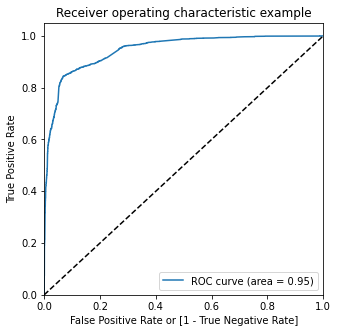

In [78]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Probability)

### Finding Optimal Cutoff Point

In [79]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Probability  Predicted  Lead Score  0.0  0.1  0.2  \
0          1               0.999954          1          99    1    1    1   
1          0               0.611203          1          61    1    1    1   
2          0               0.226988          0          22    1    1    1   
3          1               0.998831          1          99    1    1    1   
4          1               0.960100          1          96    1    1    1   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    1    1    1  
1    1    1    1    1    0    0    0  
2    0    0    0    0    0    0    0  
3    1    1    1    1    1    1    1  
4    1    1    1    1    1    1    1

In [80]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.391183  1.000000  0.000000
0.1   0.1  0.783604  0.966390  0.666159
0.2   0.2  0.813766  0.954527  0.723323
0.3   0.3  0.848105  0.893634  0.818852
0.4   0.4  0.885847  0.860024  0.902439
0.5   0.5  0.896520  0.839462  0.933181
0.6   0.6  0.893426  0.814551  0.944106
0.7   0.7  0.863264  0.714116  0.959096
0.8   0.8  0.839134  0.621194  0.979167
0.9   0.9  0.795978  0.495848  0.988821


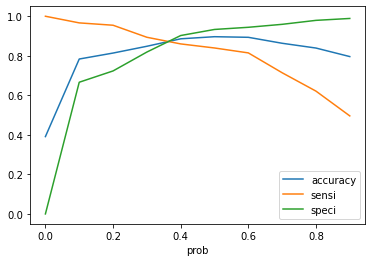

In [81]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the above curve,we can say that the optimum threshold can be 0.35

In [82]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Probability.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

Converted  Converted_Probability  Predicted  Lead Score  0.0  0.1  0.2  \
0          1               0.999954          1          99    1    1    1   
1          0               0.611203          1          61    1    1    1   
2          0               0.226988          0          22    1    1    1   
3          1               0.998831          1          99    1    1    1   
4          1               0.960100          1          96    1    1    1   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1    1    1    1                1  
1    1    1    1    1    0    0    0                1  
2    0    0    0    0    0    0    0                0  
3    1    1    1    1    1    1    1                1  
4    1    1    1    1    1    1    1                1

In [83]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8728538283062645

In [84]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3421,  515],
       [ 307, 2222]], dtype=int64)

In [85]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity

In [86]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8786081455120601

#### Specificity

In [87]:
# Let us calculate specificity
TN / float(TN+FP)

0.8691565040650406

In [88]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.13084349593495934


In [89]:
# positive predictive value 
print (TP / float(TP+FP))

0.8118377785896967


In [90]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9176502145922747


#### Precision

In [91]:
Precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
Precision

0.8118377785896967

#### Recall

In [92]:
Recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])
Recall

0.8786081455120601

### Let us make predictions now on the test set

In [93]:
X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])

In [94]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
343              0                    -0.790077                          0   
8371             0                    -0.875586                          0   
1640             0                    -0.755509                          0   
1949             0                    -0.893779                          0   
3672             0                    -0.608142                          0   

      What is your current occupation_Working Professional  \
343                                                   0      
8371                                                  0      
1640                                                  0      
1949                                                  0      
3672                                                  0      

      Last Activity_SMS Sent  Tags_Busy  Tags_Closed by Horizzon  \
343                        0          0                        0   
8371                       0          0                        0   
1640                       0          0                        0   
1949                       1          0                        0   
3672                       0          0                        0   

      Tags_In confusion whether part time or DLP  Tags_Lost to EINS  \
343                                            0                  0   
8371                                           0                  0   
1640                                           0                  0   
1949                                           0                  0   
3672                                           0                  0   

      Tags_Ringing  Tags_Will revert after reading the email  \
343              0                                         1   
8371             0                                         1   
1640             1                                         0   
1949             0                                         1   
3672             0                                         1   

      Tags_in touch with EINS  Tags_switched off  \
343                         0                  0   
8371                        0                  0   
1640                        0                  0   
1949                        0                  0   
3672                        0                  0   

      Last Notable Activity_Modified  \
343                                0   
8371                               0   
1640                               0   
1949                               1   
3672                               1   

      Last Notable Activity_Olark Chat Conversation  \
343                                               0   
8371                                              0   
1640                                              0   
1949                                              0   
3672                                              0   

      Last Notable Activity_Unsubscribed  
343                                    0  
8371                                   0  
1640                                   0  
1949                                   0  
3672                                   0

In [95]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [96]:
y_test_pred = res.predict(X_test_sm)

In [97]:
y_test_pred[:10]

343     0.274973
8371    0.258093
1640    0.004028
1949    0.269241
3672    0.080577
5688    0.998336
8072    0.979706
8334    0.657075
349     0.002022
9225    0.000616
dtype: float64

In [98]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
343   0.274973
8371  0.258093
1640  0.004028
1949  0.269241
3672  0.080577

In [99]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [100]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [101]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion Probability'})
y_pred_final.head()

Converted  Conversion Probability
343           0                0.274973
8371          0                0.258093
1640          0                0.004028
1949          1                0.269241
3672          0                0.080577

In [102]:
y_pred_final['Prospect ID']=leads['Prospect ID']

In [103]:
y_pred_final.head()

Converted  Conversion Probability                           Prospect ID
343           0                0.274973  80df0d02-675e-42bf-9fc0-43c651c63aab
8371          0                0.258093  eb027417-ce32-415f-a471-4a7a4f05b444
1640          0                0.004028  d20886b8-4a7e-11e6-b61b-22000aa8e760
1949          1                0.269241  5c5f84ae-e078-46d4-ace4-dd80284c9e14
3672          0                0.080577  3768ca3f-8c14-432c-9ff2-03a3b6bc55b9

In [104]:
y_pred_final['final_predicted'] = y_pred_final['Conversion Probability'].map(lambda x: 1 if x > 0.35 else 0)

In [105]:
#Assigning the lead score to predicted values
y_pred_final['Lead Score'] = (y_pred_final['Conversion Probability']*100).astype(int)
y_pred_final.head()

Converted  Conversion Probability                           Prospect ID  \
343           0                0.274973  80df0d02-675e-42bf-9fc0-43c651c63aab   
8371          0                0.258093  eb027417-ce32-415f-a471-4a7a4f05b444   
1640          0                0.004028  d20886b8-4a7e-11e6-b61b-22000aa8e760   
1949          1                0.269241  5c5f84ae-e078-46d4-ace4-dd80284c9e14   
3672          0                0.080577  3768ca3f-8c14-432c-9ff2-03a3b6bc55b9   

      final_predicted  Lead Score  
343                 0          27  
8371                0          25  
1640                0           0  
1949                0          26  
3672                0           8

In [106]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8733766233766234

In [107]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1509,  233],
       [ 118,  912]], dtype=int64)

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8786081455120601

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.8691565040650406

In [110]:
# Calculate false postive rate - predicting converted when customer has not been converted 
print(FP/ float(TN+FP))

0.13084349593495934


In [111]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8118377785896967


In [112]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9176502145922747


In [113]:
#Let us check Precision
Precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
Precision

0.8118377785896967

In [114]:
#Let us check Recall
Recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])
Recall

0.8786081455120601

### The potential leads predicted by the model

In [115]:
#Hot Leads
y_pred_final[y_pred_final['Lead Score'] > 75].sort_values(by='Lead Score', ascending=False)

Converted  Conversion Probability                           Prospect ID  \
5688          1                0.998336  f1d1bef7-e296-47bd-90bc-05beff0b595c   
5293          1                0.999988  b1f90f08-8cc5-4e9c-a629-02078ece8999   
7893          1                0.999983  c1b12959-1449-43be-8184-cfafe0b11675   
8089          1                0.998677  a6f8ee6c-73f0-4beb-87e0-479e0a615a53   
2672          1                0.998677  37465564-9752-4a25-adb0-8beeb99b7a95   
...         ...                     ...                                   ...   
1435          0                0.765850  6d55fef8-2a68-4eac-9225-8d4744227bea   
1826          1                0.767494  4a8d25e6-034c-4a13-8bc4-d4dd1de1a495   
1807          0                0.762629  339ffc91-990c-4ead-8e96-51867f292e8d   
6534          1                0.768803  2f823185-6723-41a4-81d9-a804a4c49bd0   
200           1                0.767333  a996259c-fab6-4fb6-bf41-7c68fbb22114   

      final_predicted  Lead Score  
5688                1          99  
5293                1          99  
7893                1          99  
8089                1          99  
2672                1          99  
...               ...         ...  
1435                1          76  
1826                1          76  
1807                1          76  
6534                1          76  
200                 1          76  

[751 rows x 5 columns]

 ### Thanks